# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-12 16:09:45--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-12 16:09:45--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.02s   

2025-03-12 16:09:45 (3.60 MB/s) - ‘Eco

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
print(df.shape)
print(df.info())

(500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


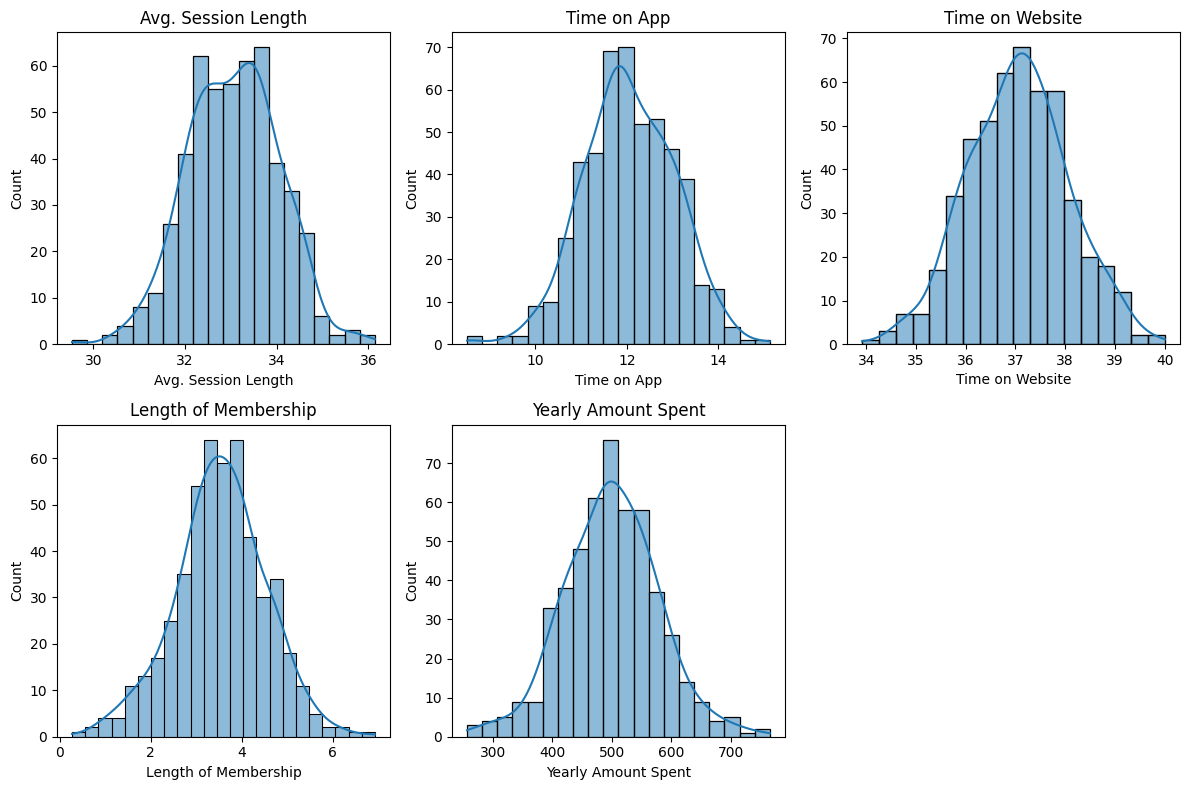

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, col in enumerate(['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']):
  plt.subplot(2, 3, i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(col)

plt.tight_layout()
plt.show()


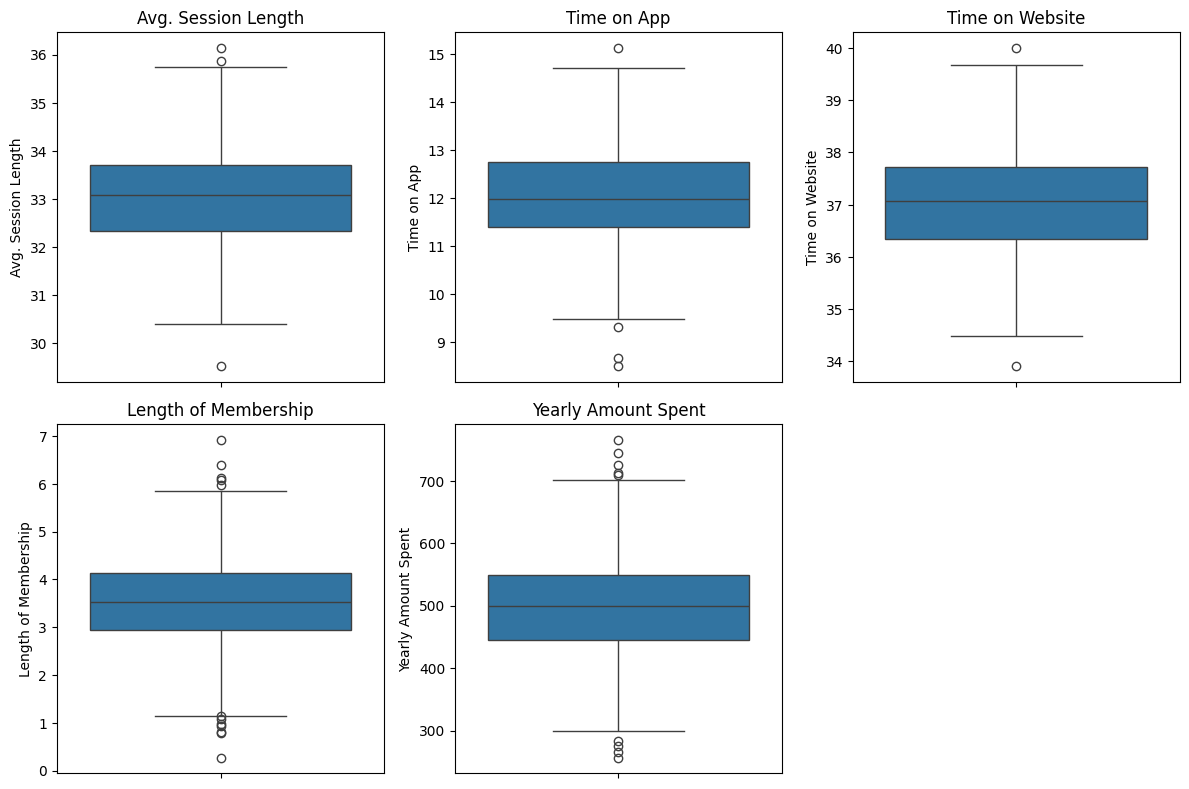

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(y=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()


**Observando los Histogramas noto que:**

**Length of Membership:**

La distribución de la antigüedad de membresía parece ser ligeramente sesgada a la derecha, con la mayoría de los clientes teniendo entre 2 y 4 años de membresía.

**Yearly Amount Spent:**

 La distribución del gasto anual también está sesgada a la derecha, con la mayoría de los clientes gastando entre 450 y 550 dólares al año.

Posibles Escenarios y Acciones:

Escenario 1: Tiempo en el Sitio Web Bajo, pero Buen Rendimiento:

Si el sitio web cumple su función principal a pesar del tiempo de visita menor, podría no ser necesario priorizar una mejora drástica. En este caso, podemos enfocarnos en optimizaciones puntuales para mejorar la experiencia del usuario.

Escenario 2: Tiempo en el Sitio Web Bajo y Bajo Rendimiento:

Si el sitio web tiene un bajo rendimiento, es crucial investigar las causas y mejorar la experiencia del usuario.

Escenario 3: Tiempo en la App Alto y Mayor Gasto:

Si los usuarios que pasan más tiempo en la app gastan significativamente más, podriamos enfocarnos en mejorar la app y en estrategias para dirigir a los usuarios hacia ella.

## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [21]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Todas estas columnas reflejan la interacción y el compromiso del cliente con la tienda, ya sea a través de la app o el sitio web. A mayor interacción, mayor exposición a productos y ofertas, lo que aumenta la probabilidad de que el cliente realice compras y, por lo tanto, aumente su gasto anual.

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

Apartar datos para prueba es como crear un entorno de "simulación" para evaluar qué tan bien es el modelo (o el equipo de ventas) se generaliza a nuevas situaciones.

Es crucial para predecir clientes futuros porque te permite evaluar la capacidad del modelo para predecir comportamientos de clientes que no ha visto antes, lo que te da una idea más realista de su desempeño en el "mundo real".

## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [25]:
LinearRegression()

LinearRegression()

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)


Intercepto: -1057.6995744132503
Coeficientes: [26.02948861 38.70983485  0.35618404 61.47280903]


si el coeficiente de "Time on App" es grande y positivo en el modelo de regresión, significa que existe una fuerte correlación positiva entre el tiempo que los usuarios pasan en la aplicación y la cantidad anual que gastan. En otras palabras, mientras más tiempo pasan los usuarios en la app, más tienden a gastar.

Con esta información se pueden crear campañas como:
- Mejorar la Experiencia del Usuario
- Implementar Estrategias de Gamificación
- Promociones y Ofertas Exclusivas en la App
- Contenido Interactivo y Social

el objetivo es crear una experiencia de usuario atractiva, personalizada y gratificante que motive a los usuarios a pasar más tiempo en la app, lo que a su vez aumentará la probabilidad de que realicen compras y generen mayores ingresos para el negocio.

## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = lm.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


MSE: 91.82335857016862
MAE: 7.758907540457838
R^2: 0.9881661299145554


Un R² de 0.80 o 0.90 es un buen indicador de que el modelo tiene un buen poder predictivo. Para los objetivos como gerente de marketing, es probable que sea suficiente para obtener insights valiosos y tomar decisiones informadas. Sin embargo, siempre es bueno mejorar el modelo y evaluar su desempeño en el contexto de tus objetivos específicos.

La aceptabilidad de un MAE de 15 USD depende de tel contexto específico. Considerando el rango de gasto de los clientes, el impacto de los errores en las decisiones y la tolerancia al riesgo.  Si los clientes gastan en promedio 50 USD al año, un MAE de 15 USD representa un error significativo (30%). En este caso, el margen de error podría ser demasiado alto y afectar la confiabilidad de las predicciones.

## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

In [28]:
print('Coeficientes:', lm.coef_)

coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': lm.coef_})
variable_mas_influyente = coef_df.loc[coef_df['Coeficiente'].abs().idxmax(), 'Variable']
print(f'\nLa variable más influyente es: {variable_mas_influyente}')


Coeficientes: [26.02948861 38.70983485  0.35618404 61.47280903]

La variable más influyente es: Length of Membership


Me enfocaria en Acciones:

recomendaciones como, ejemplo: "Para aumentar el gasto, debemos mejorar la experiencia en la app e incentivar la fidelización."
Priorizando: "Nuestra principal recomendación es invertir en nuevas funcionalidades para la app, ya que tiene el mayor impacto."
Cuantifica el impacto (si es posible): "Estimamos que una mejora en la app podría aumentar el gasto en un X%."

Basándome en los coeficientes del modelo, para aumentar el gasto anual de los clientes me enfocaría en: mejorar la experiencia en la app invirtiendo en nuevas funcionalidades, optimizando la usabilidad y personalizando el contenido para incentivar un mayor tiempo de uso; y fortaleceiendo el programa de fidelización ofreciendo recompensas atractivas y beneficios exclusivos para los miembros de larga duración, incentivando la retención y el gasto continuo.

## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

Informe: Análisis del Gasto Anual de Clientes y Recomendaciones

Objetivo: Comprender los factores que impulsan el gasto anual de los clientes y proponer acciones para incrementarlo.

Metodología: Se empleó un modelo de regresión lineal para analizar la relación entre el gasto anual ("Yearly Amount Spent") y variables como el tiempo en la app, duración de la sesión, tiempo en el sitio web y antigüedad de la membresía.

Variables Clave:

El análisis reveló que el tiempo que los clientes pasan en la app ("Time on App") y la duración de su membresía ("Length of Membership") son las variables que mejor explican su gasto anual. Un mayor tiempo en la app indica mayor interacción y oportunidades de compra, mientras que una mayor antigüedad como miembro sugiere fidelización y un mayor gasto a largo plazo.

Recomendaciones para Aumentar el Gasto Anual ("Yearly Amount Spent"):

Mejorar la Experiencia en la App:

Nuevas funcionalidades: Introducir características atractivas que incentiven el uso, como contenido personalizado, recomendaciones de productos o programas de recompensas.

Optimizar la usabilidad: Simplificar la navegación, mejorar los tiempos de carga y asegurar una experiencia intuitiva y fluida.

Personalización: Adaptar el contenido y las ofertas a las preferencias individuales de cada cliente para aumentar la relevancia y el engagement.

Fortalecer el Programa de Fidelización:

Recompensas atractivas: Ofrecer beneficios exclusivos a los miembros, como descuentos, acceso anticipado a productos o eventos especiales.

Niveles de membresía: Implementar un sistema de niveles con recompensas crecientes para incentivar la permanencia y el gasto continuo.

Comunicación personalizada: Mantener a los miembros informados sobre las novedades y ofertas relevantes a través de canales como email marketing o notificaciones push.

Limitaciones del Modelo:

Datos no considerados: El modelo solo incluyó las variables disponibles en el dataset. Factores externos como la situación económica, la competencia o las tendencias del mercado no fueron considerados.

Linealidad asumida: El modelo asume una relación lineal entre las variables predictoras y el gasto. Es posible que existan relaciones no lineales que no se capturaron.

Generalización: Si bien el modelo se evaluó con datos de prueba, su capacidad de generalizar a nuevos clientes o situaciones futuras puede estar limitada.

Para finalizar, al enfocarse en mejorar la experiencia en la app y fortalecer el programa de fidelización, se pueden implementar acciones concretas para aumentar el gasto anual de los clientes. Es fundamental monitorear el impacto de estas acciones y ajustar las estrategias según sea necesario. A pesar de sus limitaciones, este análisis proporciona una base sólida para tomar decisiones estratégicas y optimizar el rendimiento del negocio.

# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!

In [29]:
print(df.head())
print(df.shape)
print(df.info())


                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

Se usan las columnas numéricas porque son las que tienen una relación lógica y cuantitativa con la variable objetivo ('Yearly Amount Spent'). Se ignoran 'Email' y 'Address' porque no son predictivas en este contexto.

In [30]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

print('Coefficients:', lm.coef_)


Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


In [31]:
predictions = lm.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


MSE: 79.81305165097427
MAE: 7.228148653430826
R^2: 0.9890046246741234


Si el modelo muestra que 'Time on App' es la variable más influyente, el negocio puede:

Mejorar la usabilidad de la aplicación.
Agregar nuevas funcionalidades que incentiven el uso.
Implementar notificaciones push para atraer a los usuarios a la aplicación.
Ofrecer promociones exclusivas dentro de la aplicación.
Al implementar estas estrategias, el negocio puede aumentar el tiempo que los usuarios pasan en la aplicación, lo que a su vez puede llevar a un aumento en el gasto anual.

Cabe aclarar que enfocarse en mejorar la app, fortalecer la fidelización y optimizar el sitio web para aumentar el gasto anual de los clientes.
El modelo es una herramienta para tomar decisiones informadas, pero es fundamental adaptarlo al contexto específico del negocio y poder monitorear el desempeño.